# A quick start of spartan

## Import spartan
By default, backend is configured as CPU

In [ ]:
import spartan as st

## I/O: Load orginal data as st.TensorData object
(warning: Data from real-world data base usually need to remap those IDs into index from 0 to n. The following examples have already been remapped. )
    Two way to load orignal data
    - use pandas package
    - use build-in st.loadTensor interface, which support pandas-like parameters
    
    Input file can be list of tuples e.g. edgelist of a graph, with format: csv-like, sql-db, npy, npz, pickle, or their compressed forms, gz, bz2, and zip.

### 1. Plain Graph edgelist
    
    File ./inputData/yelp.edgelist.gz has the edgelist of the graph in csv-like file separated by space
        0 0 1
        0 198 1
        0 11036 1
        0 40573 1
        0 81 1
        0 84 1
        0 85 1
        ... ...

In [ ]:
#use pandas
import pandas as pd
data = pd.read_csv('./inputData/yelp.edgelist.gz', sep=' ', header=None, dtype={1:int, 2:int, 3:int})
tensor_data = st.TensorData(data)

In [ ]:
#use build-in st.loadTensor
tensor_data = st.loadTensor(path = "./inputData/yelp.edgelist.gz", sep=' ', header=None, dtype={1:int, 2:int, 3:int})

    Output of tensor_data.data

        0	1	2
        0	0	0	1
        1	0	198	1
        2	0	11036	1
        3	0	40573	1
        4	0	81	1
        ...	...	...	...
        2601672	686551	85538	1
        2601673	686552	85538	1
        2601674	686553	85538	1
        2601675	686554	85538	1
        2601676	686555	85538	1
        2601677 rows × 3 columns

In [ ]:
#generate static sparse tensor. The main reason is re-map those input ids into [0,n]
stensor = tensor_data.toSTensor(hasvalue=True, mappers={0:st.DenseIntMapper(),1:st.IntMapper()})

In [ ]:
# construct graph with a static tensor
graph = st.Graph(stensor, bipartite=True, weighted=True, modet=None)

In [ ]:
# user degree distribution
uniqued, fod = graph.degree_dist(axis=1)

In [ ]:
# plot degree distribution
fig = st.plot_dist(uniqued, fod, 'user degree', 'frequency')

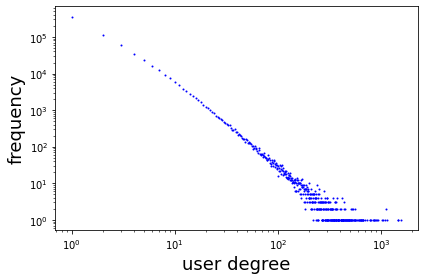

In [ ]:
# object degree distribution
uniqued, fod = graph.degree_dist(axis=0)
# plot object degree distribution
fig = st.plot_dist(uniqued, fod, 'gourmet degree', 'frequency')

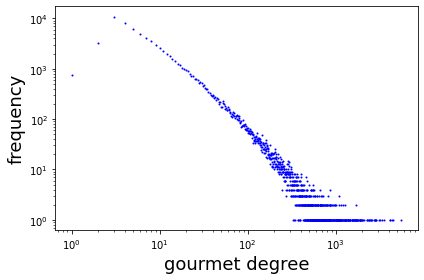

### 2. Rich graph tuples
    File ./inputData/yelp.tensor.gz has the edgelist of the graph in csv file
        0,0,2012-08-01,4,1
        1,0,2014-02-13,5,1
        2,0,2015-10-31,5,1
        3,0,2015-12-26,3,1
        4,0,2016-04-08,2,1

In [ ]:
# build-in st.loadTensor
# if col_types is not given, the types will be inferred.
# if col_idx is not given, all columns will be used in original order.
tensor_data = st.loadTensor(path = "./inputData/yelp.tensor.gz", header=None, 
                            col_idx=[0,1,2,3,4], col_types=[int,int,str,int,int])

|row id |    0	|   1	|         2    	|   3 	|   4  	|
|-----:	|-----:	|----:	|-----------:	|----:	|-----	|
|    0 	|    0 	|   0 	| 2012-08-01 	|   4 	|   1 	|
|    1 	|    1 	|   0 	| 2014-02-13 	|   5 	|   1 	|
|    2 	|    2 	|   0 	| 2015-10-31 	|   5 	|   1 	|
|    3 	|    3 	|   0 	| 2015-12-26 	|   3 	|   1 	|
|    4 	|    4 	|   0 	| 2016-04-08 	|   2 	|   1 	|
|  ... 	|  ... 	| ... 	|        ... 	| ... 	| ... 	|
| 9995 	| 4523 	| 508 	| 2013-03-06 	|   5 	|   1 	|
| 9996 	|  118 	| 508 	| 2013-03-07 	|   4 	|   1 	|
| 9997 	| 5884 	| 508 	| 2013-03-07 	|   1 	|   1 	|
| 9998 	| 2628 	| 508 	| 2013-04-08 	|   5 	|   1 	|
| 9999 	| 5885 	| 508 	| 2013-06-17 	|   5 	|   1 	|



In [ ]:
# Then, generate sparse static tensor, i.e. instance of st.STensor
stensor = tensor_data.toSTensor(hasvalue=True, mappers={2:st.TimeMapper(timeformat='%Y-%m-%d')})

Or, map column into indices and then construct STensor. 
```python
        # load a new tensor data
        #tensor_data = st.loadTensor(...)
        # separately do map
        coords, data = tensor_data.do_map(hasvalue=True, mappers={2:st.TimeMapper(timeformat='%Y-%m-%d')})
        # construct stensor
        stensor = st.STensor((coords.T, data))
```

Construct a graph with stensor

In [ ]:
# construct a graph: adjacency matrix from the first two modes of stensor
# edge properties in other modes of stensor
# modet: given the temporal mode idx if algorithm needs temporal analysis.
graph = st.Graph(stensor, bipartite=True, weighted=True, modet=2)

### 3. Time series:
    List of timeseries values from different sensors

In [ ]:
tensor_data = st.loadTensor(path = "inputData/ecg_timeseries_small.zip", sep=' ',
                            col_types = [float, float, float])

# 1-D DTensor for time ticks, and multi-dimensional array DTensor for multivariate time series
time, value =  tensor_data.toDTensor(hastticks=True)

Construct a st.Timeseires with DTensor instances.

In [ ]:
time_series = st.Timeseries(value, time)

In [ ]:
st.plot_timeseries(time_series)

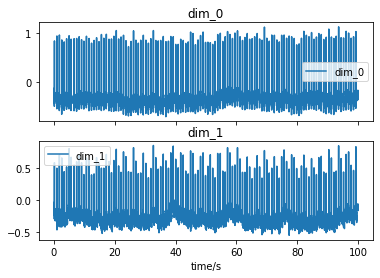